In [250]:
## Problem definition :
## To predict charges of insurance based on some inputs (age, sex, bmi, children, smoker, region)

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [252]:
insurance =pd.read_csv("D:\Sho4l\AI robotics\Task1\Task1\insurance.csv")    ## Reading csv file and convert to data frame
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [253]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()       ##to replace every string to int value
insurance['sex']=le.fit_transform(insurance['sex'])
insurance['smoker']=le.fit_transform(insurance['smoker'])
insurance['region']=le.fit_transform(insurance['region'])

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [254]:
x = insurance.drop("charges",axis=1).values #to make train data without lables in array
print(x)
print(x.shape)

[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]
(1338, 6)


In [255]:
y = insurance["charges"].values         ##to make lables without inputs in array
y= y.reshape(len(y),1)
print(y.shape)

(1338, 1)


In [256]:
ml=LinearRegression()   # model to fit data 
ml.fit(x,y)

LinearRegression()

In [257]:
x_predict = np.array([62,0,26.29,0,0,0])        ## take test sample from data
x_predict = x_predict.reshape(1,-1)             ## to compute y_predict
y_predict=ml.predict(x)
y_predict

array([[25111.24186363],
       [ 3687.60517284],
       [ 6963.14570669],
       ...,
       [ 4363.66236622],
       [ 1106.98661296],
       [37013.72809551]])

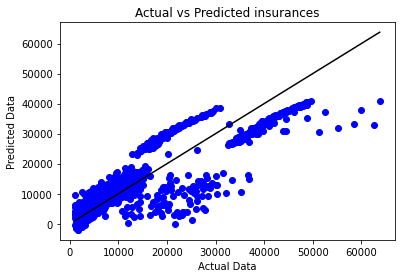

In [258]:
plt.scatter(y, y_predict, color='blue', label='Actual') ## to plot predicted data with data to look how line if fit to it
x_points = [min(y),max(y)]
y_points = [min(y),max(y)]
plt.plot(x_points, y_points, color='black') ## to plot line of data
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual vs Predicted insurances')
plt.show()

In [259]:
##  r^2 =1 - ∑ ( y i - y i ^ ) 2 ∑ ( y i - y¯ ) 2 ## 
## equation of r^2 score 

In [260]:
from  sklearn.metrics import r2_score
r2_score(y,y_predict)   ## compuet r2 from its eqation

0.7507372027994939